In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_path = "../input/spaceship-titanic/train.csv"
test_path = "../input/spaceship-titanic/test.csv"
sub_path = "../input/spaceship-titanic/sample_submission.csv"

train = pd.read_csv(train_path)
sub=pd.read_csv(sub_path)
test = pd.read_csv(test_path)


In [3]:





train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train.drop(['Name'],axis=1)

#x_train=train.drop(['Name'],axis=1)
#x_train.head()
#x_train.shape[0]




,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [6]:

train.isna().sum().sum()
train.shape[0]

8693

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

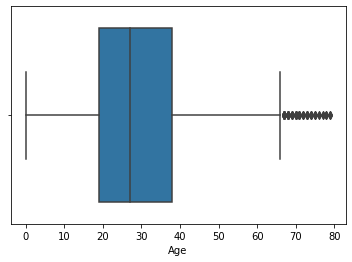

In [7]:
import seaborn as sns
sns.boxplot(train['Age'])


In [9]:
Q1 = np.percentile(train['Age'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(train['Age'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1



In [10]:
upper = train['Age'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = train['Age'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))


Upper bound: 0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689    False
8690    False
8691    False
8692    False
Name: Age, Length: 8693, dtype: bool
(array([], dtype=int64),)
Lower bound: 0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689    False
8690    False
8691    False
8692    False
Name: Age, Length: 8693, dtype: bool
(array([], dtype=int64),)


In [11]:
train.drop(upper[0], inplace = True)
train.drop(lower[0], inplace = True)
print("New Shape: ", train.shape)


KeyError: '[False] not found in axis'

In [12]:







def fillna (df):
    for i in df.columns:
        if df[i].dtypes=='float64':
            df[i].fillna(df[i].median(), inplace=True)
        else:
            df[i].fillna(df[i].mode()[0], inplace=True)
fillna (train)
#x_train=x_train.dropna()
train.isnull().sum()


PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [13]:
train['new_PI'] = train['PassengerId'].str[0:4]



In [14]:

train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_PI
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004


In [15]:



train.drop(['PassengerId'],axis=1)


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_PI
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280


In [ ]:


#One hot encoding
#x_train = pd.get_dummies(x_train, columns = ['HomePlanet', 'CryoSleep','Destination','VIP'])
#x_train.head()


In [16]:



train['HomePlanet'].unique()


array(['Europa', 'Earth', 'Mars'], dtype=object)

In [17]:








from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train['HomePlanet']= label_encoder.fit_transform(train['HomePlanet'])
  
train['HomePlanet'].unique()


array([1, 0, 2])

In [18]:

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_PI
0,0001_01,1,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,0002_01,0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,0003_01,1,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,0003_02,1,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,0004_01,0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004


In [19]:


label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train['CryoSleep']= label_encoder.fit_transform(train['CryoSleep'])
  
train['CryoSleep'].unique()


array([0, 1])

In [20]:





label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train['Destination']= label_encoder.fit_transform(train['Destination'])
  
train['Destination'].unique()


array([2, 1, 0])

In [21]:


label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train['VIP']= label_encoder.fit_transform(train['VIP'])
  
train['VIP'].unique()


array([0, 1])

In [22]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train['Transported']= label_encoder.fit_transform(train['Transported'])
  
train['Transported'].unique()


array([0, 1])

In [23]:


train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_PI
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0003
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0003
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0004


In [24]:
train['Cabin'].unique()


array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [25]:

train['new_Cabin'] = train['Cabin'].str.get(-1)



In [26]:
train['new_Cabin_1']=train['Cabin'].str.get(2)

In [27]:
train['new_Cabin_2']=train['Cabin'].str.get(0)

In [28]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_PI,new_Cabin,new_Cabin_1,new_Cabin_2
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,P,0,B
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,S,0,F
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0003,S,0,A
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0003,S,0,A
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0004,S,1,F


In [29]:
train.drop(['Cabin'],axis=1)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_PI,new_Cabin,new_Cabin_1,new_Cabin_2
0,0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,P,0,B
1,0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,S,0,F
2,0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0003,S,0,A
3,0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0003,S,0,A
4,0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0004,S,1,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,9276,P,9,A
8689,9278_01,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,9278,S,1,G
8690,9279_01,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,9279,S,1,G
8691,9280_01,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,9280,S,6,E


In [ ]:




#One hot Encoding
#x_train = pd.get_dummies(x_train, columns = ['new_Cabin'])
#x_train.head()

In [30]:

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

  
# Encode labels in column 'species'.
train['new_Cabin']= label_encoder.fit_transform(train['new_Cabin'])
  
train['new_Cabin'].unique()


array([0, 1])

In [31]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train['new_Cabin_2']= label_encoder.fit_transform(train['new_Cabin_2'])
  
train['new_Cabin_2'].unique()


array([1, 5, 0, 6, 4, 3, 2, 7])

In [32]:


train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_PI,new_Cabin,new_Cabin_1,new_Cabin_2
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,0,0,1
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,1,0,5
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0003,1,0,0
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0003,1,0,0
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0004,1,1,5


In [33]:

train.drop(['PassengerId','Cabin'],axis=1)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_PI,new_Cabin,new_Cabin_1,new_Cabin_2
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,0,0,1
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,1,0,5
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0003,1,0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0003,1,0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0004,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,9276,0,9,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,9278,1,1,6
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,9279,1,1,6
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,9280,1,6,4


In [34]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train['new_PI']= label_encoder.fit_transform(train['new_PI'])
  
train['new_PI'].unique()


array([   0,    1,    2, ..., 6214, 6215, 6216])

In [35]:

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_PI,new_Cabin,new_Cabin_1,new_Cabin_2
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,0,0,1
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,1,1,0,5
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,2,1,0,0
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,2,1,0,0
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,3,1,1,5


In [36]:
train.drop(['PassengerId','Cabin'],axis=1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_PI,new_Cabin,new_Cabin_1,new_Cabin_2
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,0,0,1
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,1,1,0,5
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,2,1,0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,2,1,0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,3,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,6213,0,9,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,6214,1,1,6
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,6215,1,1,6
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,6216,1,6,4


In [37]:

train['Total_expenses'] =train['RoomService'] + train['FoodCourt'] + train['ShoppingMall']+train['Spa']+train['VRDeck']


In [38]:
train.drop(['PassengerId','Cabin'],axis=1)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_PI,new_Cabin,new_Cabin_1,new_Cabin_2,Total_expenses
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,0,0,1,0.0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,1,1,0,5,736.0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,2,1,0,0,10383.0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,2,1,0,0,5176.0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,3,1,1,5,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,6213,0,9,0,8536.0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,6214,1,1,6,0.0
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,6215,1,1,6,1873.0
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,6216,1,6,4,4637.0


In [ ]:
#x_train.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis=1)

In [39]:

train.loc[train['Age']<=12, 'age_group'] = 'kid'
train.loc[train['Age'].between(13,19), 'age_group'] = 'teenage'
train.loc[train['Age'].between(20,60), 'age_group'] = 'adult'
train.loc[train['Age']>61, 'age_group'] = 'older_adult'


In [40]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train['age_group']= label_encoder.fit_transform(train['age_group'])
  
train['age_group'].unique()


array([0, 3, 1, 2, 4])

In [41]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_PI,new_Cabin,new_Cabin_1,new_Cabin_2,Total_expenses,age_group
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,0,0,1,0.0,0
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,1,1,0,5,736.0,0
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,2,1,0,0,10383.0,0
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,2,1,0,0,5176.0,0
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,3,1,1,5,1091.0,3


In [ ]:

# data standardization with  sklearn
"""

from sklearn.preprocessing import StandardScaler

# copy of datasets
x_train = x_train.copy()
#X = X_test.copy()

# numerical features
num_cols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_expenses']
#num_cols=['Age','Total_expenses']
# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(x_train[[i]])
    
    # transform the training data column
    x_train[i] = scale.transform(x_train[[i]])
    
    # transform the testing data column
   # X_test_stand[i] = scale.transform(X_test_stand[[i]])
   """

In [42]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_PI,new_Cabin,new_Cabin_1,new_Cabin_2,Total_expenses,age_group
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,0,0,1,0.0,0
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,1,1,0,5,736.0,0
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,2,1,0,0,10383.0,0
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,2,1,0,0,5176.0,0
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,3,1,1,5,1091.0,3


In [43]:
def outlier_detection_train(train, n, columns):
    rows = []
    will_drop_train = []
    for col in columns:
        Q1 = np.nanpercentile(train[col], 25)
        Q3 = np.nanpercentile(train[col], 75)
        IQR = Q3 - Q1
        outlier_point = 1.5 * IQR
        rows.extend(train[(train[col] < Q1 - outlier_point)|(train[col] > Q3 + outlier_point)].index)
    for r, c in Counter(rows).items():
        if c >= n: will_drop_train.append(r)
    return will_drop_train


In [44]:
will_drop_train = outlier_detection_train(train, 5 ,train.select_dtypes(["float", "int"]).columns)
train.drop(will_drop_train, inplace = True, axis = 0)

NameError: name 'Counter' is not defined

In [45]:
features=['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','new_Cabin','new_PI','new_Cabin_1','new_Cabin_2','Total_expenses','age_group']
X = train.loc[:, features]
y = train.loc[:, ['Transported']]


In [46]:
X.head()



,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,new_Cabin,new_PI,new_Cabin_1,new_Cabin_2,Total_expenses,age_group
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,5,736.0,0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1,2,0,0,10383.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1,2,0,0,5176.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,3,1,5,1091.0,3


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [48]:
#Hyper parameter tuning


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

import catboost as ctb

model = ctb.CatBoostClassifier()

parameters = {'depth'         : sp_randInt(4,10),
              'learning_rate' : sp_randFloat(),
              'iterations'    : sp_randInt(10,1000)
             # 'border_count':sp_randInt(5,200),
             # 'l2_leaf_reg': sp_randInt(1,100),
             #'n_estimators': sp_randInt(100,500)
              #'ctr_border_count' : sp_randInt(5,200)
              
              #'border_count':[5,10,20,50,100,200],
              #'l2_leaf_reg': [1,3,5,10,100],
              
               
                 }
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 2,n_iter=10, n_jobs=-1)
randm.fit(X_train,y_train)

#Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2,n_iter=10, n_jobs=-1)
#Grid_CBC.fit(X_train, y_train)

#print(" Results from Grid Search " )
#print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
#print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
#print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)
print("Results from random search")
print("\n The best score across ALL searched params:\n",randm.best_estimator_)
print("\n The best score across ALL searched params:\n",randm.best_score_)
print("\n The best parameters across ALL searched params:\n",randm.best_params_)





0:	learn: 0.5145950	total: 67.2ms	remaining: 58.7s
1:	learn: 0.4450121	total: 78.5ms	remaining: 34.2s
2:	learn: 0.4204047	total: 94.8ms	remaining: 27.5s
3:	learn: 0.4058934	total: 106ms	remaining: 23s
4:	learn: 0.3902888	total: 122ms	remaining: 21.1s
5:	learn: 0.3815123	total: 133ms	remaining: 19.2s
6:	learn: 0.3730183	total: 148ms	remaining: 18.4s
7:	learn: 0.3616661	total: 159ms	remaining: 17.2s
8:	learn: 0.3479929	total: 173ms	remaining: 16.7s
9:	learn: 0.3442116	total: 184ms	remaining: 15.9s
10:	learn: 0.3350715	total: 195ms	remaining: 15.3s
11:	learn: 0.3284809	total: 210ms	remaining: 15.1s
12:	learn: 0.3236487	total: 220ms	remaining: 14.6s
13:	learn: 0.3177319	total: 231ms	remaining: 14.2s
14:	learn: 0.3045843	total: 243ms	remaining: 13.9s
15:	learn: 0.2998164	total: 253ms	remaining: 13.6s
16:	learn: 0.2952975	total: 263ms	remaining: 13.3s
17:	learn: 0.2864046	total: 274ms	remaining: 13s
18:	learn: 0.2778879	total: 284ms	remaining: 12.8s
19:	learn: 0.2727526	total: 294ms	remainin

In [49]:
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 1)
#classifier.fit(X_train, y_train)


#from xgboost import XGBClassifier
#classifier = XGBClassifier(enable_categorical=True)
#classifier.fit(X_train, y_train)



import catboost as ctb
classifier = ctb.CatBoostClassifier(max_depth=5,learning_rate=0.04)
classifier.fit(X_train, y_train)


#import lightgbm as lgb
#classifier = lgb.LGBMClassifier()
#classifier.fit(X_train, y_train)




#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train, y_train)


0:	learn: 0.6764106	total: 3.55ms	remaining: 3.55s
1:	learn: 0.6610480	total: 6.54ms	remaining: 3.26s
2:	learn: 0.6463409	total: 9.48ms	remaining: 3.15s
3:	learn: 0.6323646	total: 12.8ms	remaining: 3.19s
4:	learn: 0.6195605	total: 15.5ms	remaining: 3.08s
5:	learn: 0.6079841	total: 18.3ms	remaining: 3.02s
6:	learn: 0.5973256	total: 20.9ms	remaining: 2.96s
7:	learn: 0.5895396	total: 23.4ms	remaining: 2.91s
8:	learn: 0.5802405	total: 26.1ms	remaining: 2.87s
9:	learn: 0.5730256	total: 28.7ms	remaining: 2.84s
10:	learn: 0.5657175	total: 31.7ms	remaining: 2.85s
11:	learn: 0.5571753	total: 34.3ms	remaining: 2.83s
12:	learn: 0.5520271	total: 37ms	remaining: 2.81s
13:	learn: 0.5453079	total: 39.7ms	remaining: 2.8s
14:	learn: 0.5404782	total: 42.4ms	remaining: 2.79s
15:	learn: 0.5347571	total: 45.1ms	remaining: 2.77s
16:	learn: 0.5304415	total: 47.7ms	remaining: 2.76s
17:	learn: 0.5254214	total: 50.5ms	remaining: 2.76s
18:	learn: 0.5209487	total: 53.2ms	remaining: 2.75s
19:	learn: 0.5165900	tota

In [50]:
y_pred = classifier.predict(X_test)


In [51]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))


Accuracy :  0.8206071757129715


In [52]:
p_id = test["PassengerId"]



In [53]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [54]:
fillna(test)
test.isnull().sum()


PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [ ]:
#new_test = pd.get_dummies(new_test, columns = ['HomePlanet', 'CryoSleep','Destination','VIP'])
#new_test.head()


In [55]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
test['Destination']= label_encoder.fit_transform(test['Destination'])
  
test['Destination'].unique()
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,2,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,2,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,0,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,2,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,2,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [56]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
test['HomePlanet']= label_encoder.fit_transform(test['HomePlanet'])
  
test['HomePlanet'].unique()


array([0, 1, 2])

In [57]:





label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
test['CryoSleep']= label_encoder.fit_transform(test['CryoSleep'])
  
test['CryoSleep'].unique()


array([1, 0])

In [58]:



label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
test['VIP']= label_encoder.fit_transform(test['VIP'])
  
test['VIP'].unique()


array([0, 1])

In [59]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,0,1,G/3/S,2,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,0,0,F/4/S,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,1,1,C/0/S,0,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,1,0,C/1/S,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,0,0,F/5/S,2,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [60]:


test['new_Cabin'] = test['Cabin'].str.get(-1)


In [61]:
test['new_Cabin_1'] = test['Cabin'].str.get(2)



In [62]:
test['new_Cabin_2'] = test['Cabin'].str.get(0)


In [63]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,new_Cabin,new_Cabin_1,new_Cabin_2
0,0013_01,0,1,G/3/S,2,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,S,3,G
1,0018_01,0,0,F/4/S,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,S,4,F
2,0019_01,1,1,C/0/S,0,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,S,0,C
3,0021_01,1,0,C/1/S,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,S,1,C
4,0023_01,0,0,F/5/S,2,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,S,5,F


In [64]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
test['new_Cabin']= label_encoder.fit_transform(test['new_Cabin'])
  
test['new_Cabin'].unique()


array([1, 0])

In [65]:


label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
test['new_Cabin_2']= label_encoder.fit_transform(test['new_Cabin_2'])
  
test['new_Cabin_2'].unique()


array([6, 5, 2, 1, 3, 4, 0, 7])

In [66]:
test['new_PI'] = test['PassengerId'].str[0:4]


In [67]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
test['new_PI']= label_encoder.fit_transform(test['new_PI'])
  
test['new_PI'].unique()


array([   0,    1,    2, ..., 3060, 3061, 3062])

In [68]:

test['Total_expenses'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall']+test['Spa']+test['VRDeck']


In [69]:
test.loc[test['Age']<=12, 'age_group'] = 'kid'
test.loc[test['Age'].between(13,19), 'age_group'] = 'teenage'
test.loc[test['Age'].between(20,60), 'age_group'] = 'adult'
test.loc[test['Age']>61, 'age_group'] = 'older_adult'


In [70]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,new_Cabin,new_Cabin_1,new_Cabin_2,new_PI,Total_expenses,age_group
0,0013_01,0,1,G/3/S,2,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1,3,6,0,0.0,adult
1,0018_01,0,0,F/4/S,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,4,5,1,2832.0,teenage
2,0019_01,1,1,C/0/S,0,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,0,2,2,0.0,adult
3,0021_01,1,0,C/1/S,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,1,2,3,7418.0,adult
4,0023_01,0,0,F/5/S,2,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,5,5,4,645.0,adult


In [71]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
test['age_group']= label_encoder.fit_transform(test['age_group'])
  
test['age_group'].unique()


array([0, 3, 2, 1, 4])

In [72]:
t=test.drop(['Cabin','Name','PassengerId'],axis=1)
t.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,new_Cabin,new_Cabin_1,new_Cabin_2,new_PI,Total_expenses,age_group
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,1,3,6,0,0.0,0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,4,5,1,2832.0,3
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,1,0,2,2,0.0,0
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,1,2,3,7418.0,0
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,1,5,5,4,645.0,0


In [73]:
t.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,new_Cabin,new_Cabin_1,new_Cabin_2,new_PI,Total_expenses,age_group
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,1,3,6,0,0.0,0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,4,5,1,2832.0,3
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,1,0,2,2,0.0,0
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,1,2,3,7418.0,0
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,1,5,5,4,645.0,0


In [74]:
d=classifier.predict(t)
da_lr=pd.DataFrame(d)
da_lr


,0
0,1
1,0
2,1
3,1
4,1
...,...
4272,1
4273,0
4274,1
4275,1


In [75]:
d = pd.DataFrame(d, columns=["Transported"])
d.head()

,Transported
0,1
1,0
2,1
3,1
4,1


In [76]:
d['Transported'] = d['Transported'].map({1:True,0:False})


In [78]:
submission = pd.concat([pd.read_csv("/kaggle/input/spaceship-titanic/test.csv"), pd.DataFrame(d)], axis=1)[["PassengerId", "Transported"]]
submission.to_csv('submission_48.csv',index=False)
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


121:	learn: 0.0546058	total: 2.26s	remaining: 2.24s
122:	learn: 0.0545213	total: 2.28s	remaining: 2.22s
123:	learn: 0.0538807	total: 2.29s	remaining: 2.2s
124:	learn: 0.0535099	total: 2.31s	remaining: 2.19s
125:	learn: 0.0534349	total: 2.33s	remaining: 2.17s
126:	learn: 0.0528517	total: 2.35s	remaining: 2.15s
127:	learn: 0.0524390	total: 2.37s	remaining: 2.13s
128:	learn: 0.0519624	total: 2.39s	remaining: 2.11s
129:	learn: 0.0517247	total: 2.4s	remaining: 2.09s
130:	learn: 0.0511000	total: 2.42s	remaining: 2.07s
131:	learn: 0.0508188	total: 2.44s	remaining: 2.05s
132:	learn: 0.0504200	total: 2.46s	remaining: 2.03s
133:	learn: 0.0501039	total: 2.48s	remaining: 2.01s
134:	learn: 0.0492738	total: 2.49s	remaining: 1.99s
135:	learn: 0.0488055	total: 2.51s	remaining: 1.98s
136:	learn: 0.0484131	total: 2.53s	remaining: 1.96s
137:	learn: 0.0481360	total: 2.55s	remaining: 1.94s
138:	learn: 0.0476645	total: 2.56s	remaining: 1.92s
139:	learn: 0.0473669	total: 2.58s	remaining: 1.9s
140:	learn: 0.0